In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
train_ = pd.read_csv('../data/cleaned_train.csv')
store_ = pd.read_csv('../data/cleaned_store.csv')
test_ = pd.read_csv('../data/cleaned_test.csv')
train = train_.copy()
test = test_.copy()
store = store_.copy()

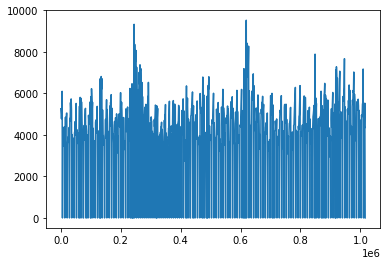

In [34]:
train1 = train.copy()
store1 = train1[train1["Store"] == 1]
plt.plot(store1.index,store1.Sales)
#train1.info()

In [13]:
results1 = adfuller(store1['Sales'])
results2 = adfuller(store1.Sales.diff().dropna())
results3 = adfuller(store1.Sales.diff().diff().dropna())
print(results1)
print(results2)
print(results3)

(-4.374783612581187, 0.00032886553525139227, 21, 920, {'1%': -3.4374778690219956, '5%': -2.864686684217556, '10%': -2.5684454926748583}, 15684.656171689703)
(-11.490966991049925, 4.737562438835476e-21, 20, 920, {'1%': -3.4374778690219956, '5%': -2.864686684217556, '10%': -2.5684454926748583}, 15685.991222442617)
(-15.99962994675175, 6.533174687784274e-29, 21, 918, {'1%': -3.4374934418959495, '5%': -2.8646935508856495, '10%': -2.568449150231867}, 15766.968127823573)


<AxesSubplot:xlabel='DayOfWeek', ylabel='Customers'>

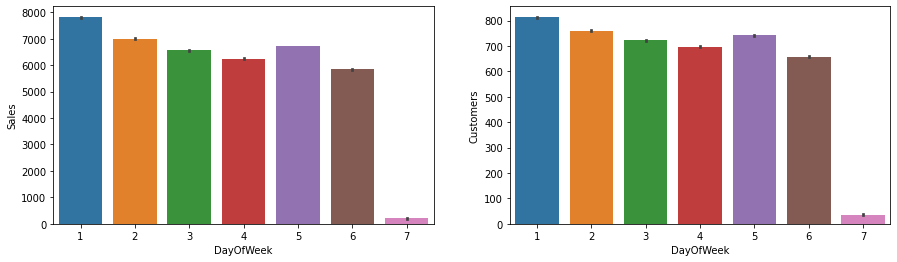

In [35]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='DayOfWeek', y='Sales', data=train1, order=[1,2,3,4,5,6,7], ax=axis1)
sns.barplot(x='DayOfWeek', y='Customers', data=train1, order=[1,2,3,4,5,6,7], ax=axis2)

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Customers'>

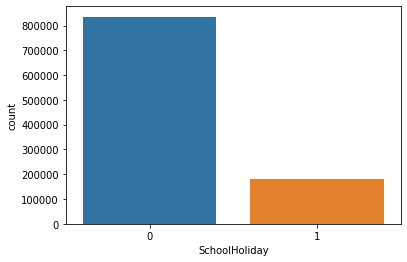

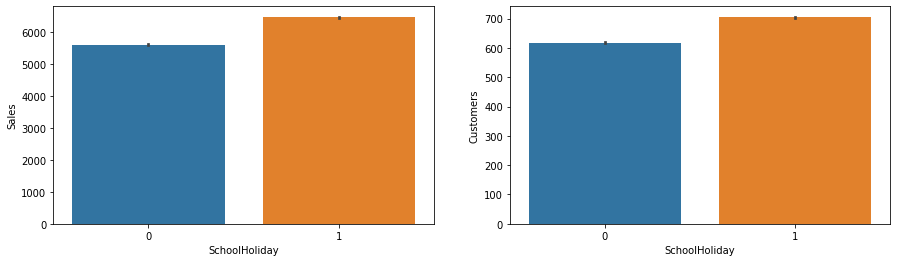

In [36]:
sns.countplot(x='SchoolHoliday', data=train1)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='SchoolHoliday', y='Sales', data=train1, ax=axis1)
sns.barplot(x='SchoolHoliday', y='Customers', data=train1, ax=axis2)

TypeError: Horizontal orientation requires numeric `x` variable.

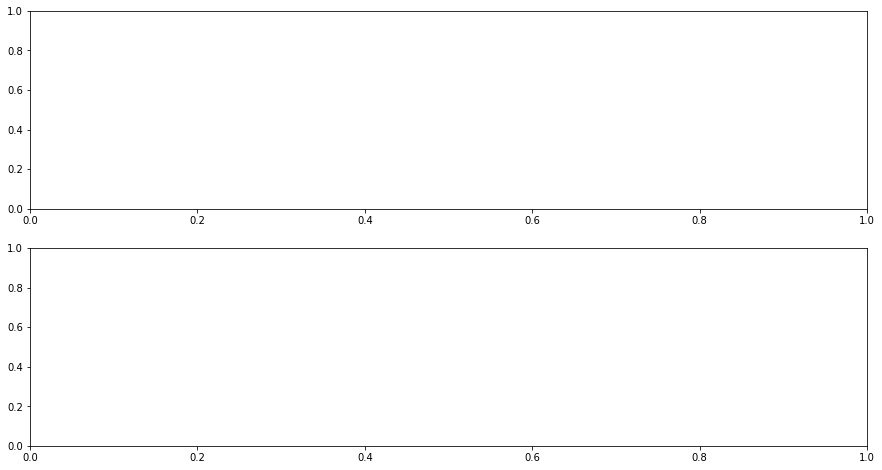

In [37]:
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,8))

# Plot max, min values, & 2nd, 3rd quartile
sns.boxplot([train1["Customers"]], whis=np.inf, ax=axis1)

# Plot sales values 
# Notice that values with 0 is mostly because the store was closed
train1["Sales"].plot(kind='hist',bins=70,xlim=(0,15000),ax=axis2)